<a href="https://colab.research.google.com/github/kuga0314/todo-ai-app/blob/main/spi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
import numpy as np
import pandas as pd

In [16]:
import pandas as pd

df = pd.read_csv("daily_logs.csv")
df.head()

,todoId,userId,date,minutes,estimatedMinutes,deadlineDate,createdDate,text
0,1fQSP4olWNYjyj9ztsIa,qEvovKzp9yTvyfV3IGR9OUERHbk1,2025-12-02,30,30,2025-12-24,2025-12-02,研究
1,53EIH4uY2PeAUhQgrVkk,DgApBqtxpeVE5G5MnIVw9ThpyN93,2025-10-16,20,240,2025-10-21,2025-10-20,中間発表の資料を完成させる
2,53EIH4uY2PeAUhQgrVkk,DgApBqtxpeVE5G5MnIVw9ThpyN93,2025-10-18,30,240,2025-10-21,2025-10-20,中間発表の資料を完成させる
3,53EIH4uY2PeAUhQgrVkk,DgApBqtxpeVE5G5MnIVw9ThpyN93,2025-10-19,90,240,2025-10-21,2025-10-20,中間発表の資料を完成させる
4,53EIH4uY2PeAUhQgrVkk,DgApBqtxpeVE5G5MnIVw9ThpyN93,2025-10-20,120,240,2025-10-21,2025-10-20,中間発表の資料を完成させる


In [17]:
df.shape
df["todoId"].nunique()
df["date"].min(), df["date"].max()

('2025-10-14', '2025-12-17')

In [18]:
(df["minutes"] == 0).mean()

np.float64(0.046296296296296294)

In [19]:
df["date"] = pd.to_datetime(df["date"])
df = df.sort_values(["todoId", "date"])

In [20]:
df["cum_minutes"] = (
    df.groupby("todoId")["minutes"]
      .cumsum()
)

In [21]:
df["pace7"] = (
    df.groupby("todoId")["minutes"]
      .rolling(window=7, min_periods=1)
      .mean()
      .reset_index(level=0, drop=True)
)

In [22]:
df["remaining"] = df["estimatedMinutes"] - df["cum_minutes"]
df.loc[df["remaining"] < 0, "remaining"] = 0

In [23]:
df["deadlineDate"] = pd.to_datetime(df["deadlineDate"])

df["daysLeft"] = (df["deadlineDate"] - df["date"]).dt.days
df.loc[df["daysLeft"] < 1, "daysLeft"] = 1

df["required"] = df["remaining"] / df["daysLeft"]

In [24]:
df["SPI"] = df["pace7"] / df["required"]

In [25]:
df[["todoId", "date", "minutes", "SPI"]].head(10)

,todoId,date,minutes,SPI
0,1fQSP4olWNYjyj9ztsIa,2025-12-02,30,inf
1,53EIH4uY2PeAUhQgrVkk,2025-10-16,20,0.454545
2,53EIH4uY2PeAUhQgrVkk,2025-10-18,30,0.394737
3,53EIH4uY2PeAUhQgrVkk,2025-10-19,90,0.933333
4,53EIH4uY2PeAUhQgrVkk,2025-10-20,120,inf
5,5KxoVTiwYbl1q6tepu0D,2025-11-12,70,3.500000
6,5KxoVTiwYbl1q6tepu0D,2025-11-17,20,inf
7,5NHkI2KZn1oWspLbrLVE,2025-10-21,60,inf
8,6tpDKogygJliGHVcRuhS,2025-11-27,10,0.500000
9,6tpDKogygJliGHVcRuhS,2025-11-28,5,0.500000


In [28]:
df["state"] = np.where(df["SPI"] < 1, "delay", "ontrack")

In [29]:
df["state"].value_counts()

,count
state,
ontrack,85
delay,23


In [30]:
df.sort_values(["todoId", "date"], inplace=True)

df[["todoId", "date", "SPI", "state"]].head(20)

,todoId,date,SPI,state
0,1fQSP4olWNYjyj9ztsIa,2025-12-02,inf,ontrack
1,53EIH4uY2PeAUhQgrVkk,2025-10-16,0.454545,delay
2,53EIH4uY2PeAUhQgrVkk,2025-10-18,0.394737,delay
3,53EIH4uY2PeAUhQgrVkk,2025-10-19,0.933333,delay
4,53EIH4uY2PeAUhQgrVkk,2025-10-20,inf,ontrack
5,5KxoVTiwYbl1q6tepu0D,2025-11-12,3.500000,ontrack
6,5KxoVTiwYbl1q6tepu0D,2025-11-17,inf,ontrack
7,5NHkI2KZn1oWspLbrLVE,2025-10-21,inf,ontrack
8,6tpDKogygJliGHVcRuhS,2025-11-27,0.500000,delay
9,6tpDKogygJliGHVcRuhS,2025-11-28,0.500000,delay


In [31]:
df["prev_state"] = df.groupby("todoId")["state"].shift(1)
df["prev_SPI"] = df.groupby("todoId")["SPI"].shift(1)

df[["todoId", "date", "prev_state", "state", "prev_SPI", "SPI"]].head(15)

,todoId,date,prev_state,state,prev_SPI,SPI
0,1fQSP4olWNYjyj9ztsIa,2025-12-02,NaN,ontrack,NaN,inf
1,53EIH4uY2PeAUhQgrVkk,2025-10-16,NaN,delay,NaN,0.454545
2,53EIH4uY2PeAUhQgrVkk,2025-10-18,delay,delay,0.454545,0.394737
3,53EIH4uY2PeAUhQgrVkk,2025-10-19,delay,delay,0.394737,0.933333
4,53EIH4uY2PeAUhQgrVkk,2025-10-20,delay,ontrack,0.933333,inf
5,5KxoVTiwYbl1q6tepu0D,2025-11-12,NaN,ontrack,NaN,3.500000
6,5KxoVTiwYbl1q6tepu0D,2025-11-17,ontrack,ontrack,3.500000,inf
7,5NHkI2KZn1oWspLbrLVE,2025-10-21,NaN,ontrack,NaN,inf
8,6tpDKogygJliGHVcRuhS,2025-11-27,NaN,delay,NaN,0.500000
9,6tpDKogygJliGHVcRuhS,2025-11-28,delay,delay,0.500000,0.500000


In [32]:
delay_events = df[
    (df["prev_state"] == "ontrack") &
    (df["state"] == "delay")
]

In [33]:
recovery_events = df[
    (df["prev_state"] == "delay") &
    (df["state"] == "ontrack")
]

In [34]:
len(delay_events), len(recovery_events)

(5, 7)

In [35]:
recovery_events[["minutes"]].describe()

,minutes
count,7.000000
mean,110.857143
std,90.444142
min,15.000000
25%,37.500000
50%,120.000000
75%,150.000000
max,266.000000


In [37]:
# ① 先に prev_minutes を df に作る
df["prev_minutes"] = df.groupby("todoId")["minutes"].shift(1)

# ② そのあとで recovery_events を再定義
recovery_events = df[
    (df["prev_state"] == "delay") &
    (df["state"] == "ontrack")
]

# ③ 確認
recovery_events[["prev_minutes", "minutes"]].dropna().head()


,prev_minutes,minutes
4,90.0,120
10,5.0,15
38,10.0,45
48,15.0,30
77,20.0,120


In [40]:
recovery_events = recovery_events.copy()

recovery_events.loc[:, "delta_minutes"] = (
    recovery_events["minutes"] - recovery_events["prev_minutes"]
)

/tmp/ipython-input-290550084.py:4: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(


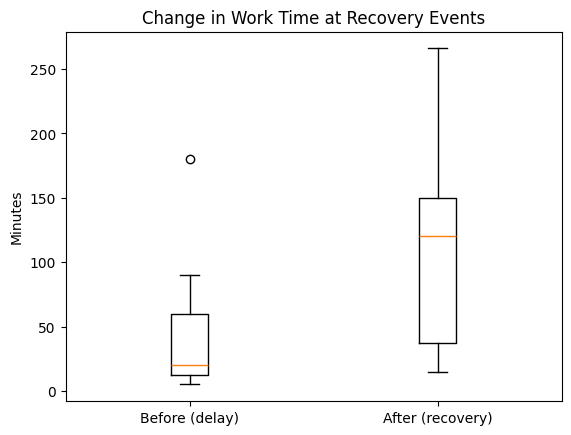

In [41]:
import matplotlib.pyplot as plt

plt.figure()
plt.boxplot(
    [recovery_events["prev_minutes"], recovery_events["minutes"]],
    labels=["Before (delay)", "After (recovery)"]
)
plt.ylabel("Minutes")
plt.title("Change in Work Time at Recovery Events")
plt.show()

In [42]:
from scipy.stats import wilcoxon

x = recovery_events["prev_minutes"]
y = recovery_events["minutes"]

wilcoxon(x, y)

WilcoxonResult(statistic=np.float64(0.0), pvalue=np.float64(0.03125))